In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
unemp_county = pd.read_csv('datasets/output.csv')
unemp_county.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [3]:
df = pd.read_csv('datasets/minwage.csv')
act_min_wage = pd.DataFrame()
for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [4]:
act_min_wage = act_min_wage.replace(0, np.NaN).dropna(axis=1)
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


In [5]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year][state]
    except:
        return np.NaN

In [6]:
get_min_wage(2012, "Colorado")

8.33

In [7]:
%%time
unemp_county['min_wage'] = list(map(get_min_wage, unemp_county['Year'], unemp_county['State']))

Wall time: 3min 28s


In [8]:
unemp_county.tail()

,Year,Month,State,County,Rate,min_wage
885543,2009,November,Maine,Somerset County,10.5,8.46
885544,2009,November,Maine,Oxford County,10.5,8.46
885545,2009,November,Maine,Knox County,7.5,8.46
885546,2009,November,Maine,Piscataquis County,11.3,8.46
885547,2009,November,Maine,Aroostook County,9.0,8.46


In [9]:
unemp_county[['Rate','min_wage']].corr()

,Rate,min_wage
Rate,1.000000,0.153047
min_wage,0.153047,1.000000


In [10]:
unemp_county[['Rate','min_wage']].cov()

,Rate,min_wage
Rate,9.687873,0.651586
min_wage,0.651586,1.874228


In [11]:
pres16 = pd.read_csv("datasets/pres16results.csv")
pres16.head(15)

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump
5,NaN,US,Darrell Castle,US,0.9951,180877.0,127592176.0,0.001418,Donald Trump
6,NaN,US,Gloria La Riva,US,0.9951,48308.0,127592176.0,0.000379,Donald Trump
7,NaN,US,Rocky De La Fuente,US,0.9951,32120.0,127592176.0,0.000252,Donald Trump
8,NaN,US,None of these candidates,US,0.9951,28824.0,127592176.0,0.000226,Donald Trump
9,NaN,US,Richard Duncan,US,0.9951,23501.0,127592176.0,0.000184,Donald Trump


In [12]:
top_candidates = pres16.head(10)['cand'].values
print(top_candidates)

['Donald Trump' 'Hillary Clinton' 'Gary Johnson' 'Jill Stein'
 'Evan McMullin' 'Darrell Castle' 'Gloria La Riva' 'Rocky De La Fuente'
 ' None of these candidates' 'Richard Duncan']


In [13]:
county_2015 = unemp_county[ (unemp_county['Year']==2015) & (unemp_county["Month"]=="February")]
county_2015.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [14]:
state_abbv = pd.read_csv("datasets/state_abbv.csv", index_col=0)
state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [15]:
state_abbv_dict = state_abbv.to_dict()['Postal Code']

In [16]:
county_2015['State'] = county_2015['State'].map(state_abbv_dict)

c:\sources\python\data_analysis\env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
county_2015.tail()

,Year,Month,State,County,Rate,min_wage
2797,2015,February,ME,Somerset County,8.4,7.92
2798,2015,February,ME,Oxford County,6.8,7.92
2799,2015,February,ME,Knox County,6.1,7.92
2800,2015,February,ME,Piscataquis County,7.0,7.92
2801,2015,February,ME,Aroostook County,7.2,7.92


In [18]:
print(len(county_2015))
print(len(pres16))

2802
18475


In [19]:
pres16.rename(columns={"county": "County", "st": "State"}, inplace=True)

In [20]:
pres16.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [21]:
for df in [county_2015, pres16]:
    df.set_index(["County", "State"], inplace=True)

In [22]:
pres16 = pres16[pres16['cand']=="Donald Trump"]
pres16 = pres16[['pct']]
pres16.dropna(inplace=True)
pres16.head(2)

pct
County State          
NaN    US     0.472993
       CA     0.330641

In [23]:
pres16.head(4)

pct
County State          
NaN    US     0.472993
       CA     0.330641
       FL     0.490640
       TX     0.525830

In [24]:
county_2015.head(2)

,,Year,Month,Rate,min_wage
County,State,,,,
Newton County,MS,2015,February,6.1,NaN
Panola County,MS,2015,February,9.4,NaN


In [25]:
all_together = county_2015.merge(pres16, on=["County", "State"])

In [26]:
all_together.dropna(inplace=True)
all_together.drop("Year", axis=1, inplace=True)
all_together.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Major County,OK,February,2.6,2.11,0.864960
Pottawatomie County,OK,February,4.5,2.11,0.701342
Johnston County,OK,February,6.5,2.11,0.770057
Jefferson County,OK,February,5.0,2.11,0.812367
Beaver County,OK,February,2.8,2.11,0.888243


In [27]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186689,-0.085985
min_wage,0.186689,1.000000,-0.325036
pct,-0.085985,-0.325036,1.000000


In [28]:
all_together.cov()

,Rate,min_wage,pct
Rate,5.743199,0.683870,-0.031771
min_wage,0.683870,2.336451,-0.076602
pct,-0.031771,-0.076602,0.023772


In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

<IPython.core.display.Javascript object>


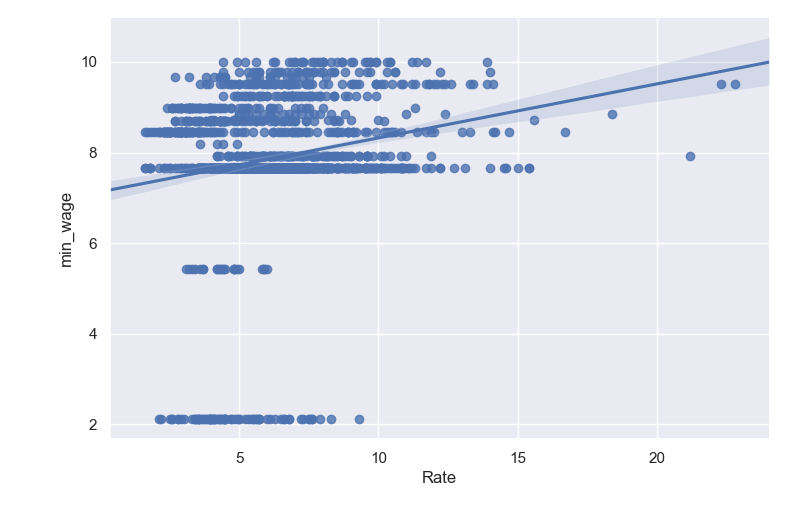

In [33]:
sns.lmplot('Rate', 'min_wage', data=all_together)